## Load and embed data using Generalized Canonical Correlation Analysis (GCCA)

In [1]:
from multiview.datasets.base import load_UCImultifeature
from multiview.embed.gcca import GCCA
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

ModuleNotFoundError: No module named 'multiview'

### Load Data

In [111]:
# Load full dataset, labels not needed
Xs, y = load_UCImultifeature()

In [56]:
# Check data
print(f'There are {len(Xs)} views.')
print(f'There are {Xs[0].shape[0]} observations')
print(f'The feature sizes are: {[X.shape[1] for X in Xs]}')

There are 6 views.
There are 2000 observations
The feature sizes are: [76, 216, 64, 240, 47, 6]


### Embed Views

In [205]:
# Create GCCA object and embed the 
gcca = GCCA()
Xs_latents1 = gcca.fit_transform(Xs, n_components=2)
Xs_latents2 = gcca.fit_transform(Xs[:5], fraction_var = 0.9)

In [206]:
print(f'The feature sizes are: {[X.shape[1] for X in Xs_latents2]}')

The feature sizes are: [9, 9, 9, 9, 9]


### Plot Individual Latent Spaces

Text(0, 0.5, 'Component 2')

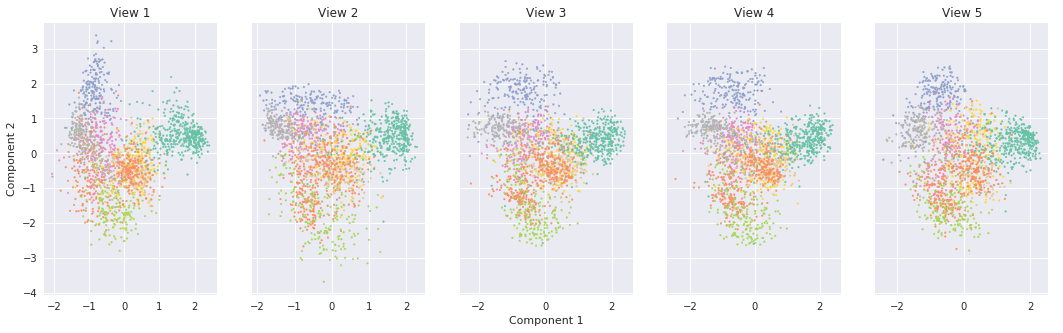

In [247]:
plt.style.use('seaborn')

color_map = [sns.color_palette("Set2", 10)[int(i)] for i in y]

fig, axes = plt.subplots(1,5,figsize=(18,5), sharey=True)

for i, (X_latent, ax) in enumerate(zip(X_latents2, axes.flatten())):
    ax.scatter(x=X_latent[:,0], y=X_latent[:,1], alpha=1, label=y, color=color_map, s=3)
    ax.set_title(f'View {i+1}')
    
ax = fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
ax.grid(False)
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')

### Plot Averaged Latent Spaces

In [227]:
Xs_latents = np.mean(Xs_latents2,axis=0)

Text(0.5, 1.0, 'Embeddings of the Average of Five Views')

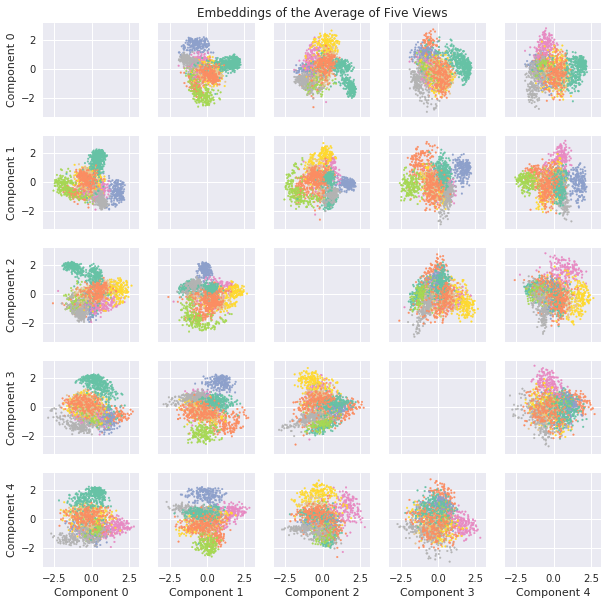

In [240]:
plt.style.use('seaborn')

color_map_scatter = [sns.color_palette("Set2", 10)[int(i)] for i in y]
color_map_hist = [sns.color_palette("Set2", 10)[int(i)] for i in np.unique(y)]

fig, axes = plt.subplots(5,5,figsize=(10,10), sharey=True, sharex=True)

for i in range(5):
    for j in range(5):
        if not i == j:
            axes[i,j].scatter(x=Xs_latents[:,i], y=Xs_latents[:,j], alpha=1, label=y, color=color_map_scatter, s=3)
        axes[4,j].set_xlabel(f'Component {j}')
    axes[i,0].set_ylabel(f'Component {i}')
    
ax = fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
ax.grid(False)
ax.set_title('Embeddings of the Average of Five Views')